In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [25]:
stress_df = pd.read_csv('/home/s232713/data/gps_trip_stress.csv')
env_df    = pd.read_csv('/home/s232713/data/foot_time_env.csv')

all_individs = stress_df["INDIVID"].unique()
print(len(all_individs))

85


In [26]:
display(stress_df.head())
print(stress_df['stress_label'].value_counts())
print(stress_df['stress_prob'].describe())
print(stress_df['stress_binary'].value_counts())
display(env_df.head())

participant ID   INDIVID            Timestamp   Latitude  Longitude  \
0             133  MMM12501  2023-11-08 13:53:57  55.814739  12.380711   
1             133  MMM12501  2023-11-08 13:53:58  55.814738  12.380678   
2             133  MMM12501  2023-11-08 13:53:59  55.814739  12.380655   
3             133  MMM12501  2023-11-08 13:54:00  55.814738  12.380632   
4             133  MMM12501  2023-11-08 13:54:01  55.814739  12.380608   

   Accuracy   Altitude     Speed  Interval ID Activity_concat   Milliseconds  \
0  4.746234  40.079327  1.594638       265109            Foot  1699451637000   
1  4.745669  40.046085  1.401877       265109            Foot  1699451638000   
2  4.744096  38.615249  1.371988       265109            Foot  1699451639000   
3  4.741475  37.977603  1.204911       265109            Foot  1699451640000   
4  4.738739  38.215747  1.293555       265109            Foot  1699451641000   

   stress_label  stress_prob  stress_binary  
0           1.0          1.0              1  
1           1.0          1.0              1  
2           1.0          1.0              1  
3           1.0          1.0              1  
4           1.0          1.0              1

stress_label
1.0    1051865
2.0      56586
Name: count, dtype: int64
count    1.108451e+06
mean     4.354283e-01
std      4.867634e-01
min      0.000000e+00
25%      0.000000e+00
50%      5.549182e-17
75%      1.000000e+00
max      1.000000e+00
Name: stress_prob, dtype: float64
stress_binary
0    740151
1    483855
Name: count, dtype: int64


INDIVID  Interval ID  GRID_ID              t_entry               t_exit  \
0  MMM12501       265109   190047  2023-11-08 13:54:08  2023-11-08 13:55:34   
1  MMM12501       265109   190703  2023-11-08 13:55:34  2023-11-08 13:56:37   
2  MMM12501       265109   190704  2023-11-08 13:53:57  2023-11-08 13:54:08   
3  MMM12501       265109   191360  2023-11-08 13:56:37  2023-11-08 13:56:37   
4  MMM12501       266118   187406  2023-11-09 11:34:35  2023-11-09 11:34:36   

          type         Start Time_x  stress             start_dt  year  ...  \
0   line_cross  2023-11-08 13:53:57       1  2023-11-08 13:53:57  2023  ...   
1   line_cross  2023-11-08 13:53:57       1  2023-11-08 13:53:57  2023  ...   
2   line_cross  2023-11-08 13:53:57       1  2023-11-08 13:53:57  2023  ...   
3  buffer_only  2023-11-08 13:53:57       1  2023-11-08 13:53:57  2023  ...   
4   line_cross  2023-11-09 11:28:42       0  2023-11-09 11:28:42  2023  ...   

       Wall  Utility Pole        Sky      Pole  Bicyclist       Bus  \
0  0.303040      0.032120  45.786037  0.131664   0.000000  0.007706   
1  0.186329      0.008888  45.511530  0.134697   0.000000  0.034084   
2  0.078812      0.029297  45.058765  0.178432   0.000134  0.000000   
3  1.113256      0.002041  35.056755  0.093575   0.000000  0.000000   
4  3.148632      0.001736  36.127605  0.046902   0.802364  0.000000   

   Lane Marking - General  Other Rider      Curb   Bicycle  
0                1.840706     0.000000  1.308880  0.027180  
1                0.584087     0.000000  1.017246  0.000000  
2                0.967426     0.000000  0.170422  0.017872  
3                0.000305     0.000000  0.768579  0.000000  
4                0.446949     0.033226  1.607914  0.262966  

[5 rows x 108 columns]

In [27]:
print(env_df.columns.values)

['INDIVID' 'Interval ID' 'GRID_ID' 't_entry' 't_exit' 'type'
 'Start Time_x' 'stress' 'start_dt' 'year' 'month' 'day' 'date' 'is_day'
 'grid_ndvi_min' 'grid_ndvi_max' 'grid_ndvi_mean' 'grid_ndvi_std'
 'mean_temp' 'acc_precip' 'bright_sunshine' 'mean_wind_speed'
 'mean_relative_hum' 'mean_pressure' 'mean_cloud_cover' 'day_L_mean'
 'day_L_std' 'day_L_min' 'day_L_max' 'day_share_quiet_' 'day_share_45_50'
 'day_share_50_55' 'day_share_55_60' 'day_share_60_65' 'day_share_65_70'
 'day_share_70_75' 'day_share_75_80' 'day_is_censored' 'night_L_mean'
 'night_L_std' 'night_L_min' 'night_L_max' 'night_share_quiet_'
 'night_share_45_50' 'night_share_50_55' 'night_share_55_60'
 'night_share_60_65' 'night_share_65_70' 'night_share_70_75'
 'night_share_75_80' 'night_is_censored' 'noise_L_mean' 'noise_L_min'
 'noise_L_max' 'noise_L_std' 'noise_share_quiet_' 'noise_share_45_50'
 'noise_share_50_55' 'noise_share_55_60' 'noise_share_60_65'
 'noise_share_65_70' 'noise_share_70_75' 'noise_share_75_80' 'lat

In [28]:
def time_weighted_mean(x: pd.Series) -> float:
    if len(x) < 2:
        return np.nan
    dt = x.index.to_series().diff().dt.total_seconds()
    dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
    dt = dt.clip(lower=0.0)
    wsum = dt.sum()
    return float((x.values * dt.values).sum() / wsum) if wsum > 0 else float(x.mean())


/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modificat

Total episodes: 15851
Total individuals: 80


/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  dt.iloc[0] = dt.iloc[1] if len(dt) > 1 else 0.0
/tmp/ipykernel_3418400/585602008.py:5: SettingWithCopyWarning: modificat

INDIVID  Interval ID             t_entry              t_exit  \
0  MMM12501       265109 2023-11-08 13:54:08 2023-11-08 13:55:34   
1  MMM12501       265109 2023-11-08 13:55:34 2023-11-08 13:56:37   
2  MMM12501       266118 2023-11-09 11:28:42 2023-11-09 11:30:48   
3  MMM12501       266118 2023-11-09 11:28:42 2023-11-09 11:30:53   
4  MMM12501       266118 2023-11-09 11:30:48 2023-11-09 11:32:23   

   duration_sec  n_samples  coverage  stress_mean  grid_ndvi_mean  \
0          86.0         86  1.000000     0.966992       -1.078620   
1          63.0         63  1.000000     0.960403       -1.456773   
2         126.0        127  1.007937     0.948012       -1.456773   
3         131.0        132  1.007634     0.949997       -0.031815   
4          95.0         95  1.000000     0.983053       -0.508666   

   noise_L_mean  ...  noise_L_mean_raw  roads_transportation_raw  \
0      0.801318  ...              52.5                      13.0   
1      0.801318  ...              52.5                      11.0   
2      0.801318  ...              52.5                      11.0   
3      0.801318  ...              52.5                      14.0   
4      0.801318  ...              52.5                      19.0   

   buildings_facilities_raw  stress_trip_c  grid_ndvi_mean_trip_c  \
0                       1.0       0.003295               0.234424   
1                       1.0      -0.003295              -0.234424   
2                       1.0      -0.017154              -1.938126   
3                       1.0      -0.015170              -0.171405   
4                       1.0       0.017887              -0.762625   

   noise_L_mean_trip_c  roads_transportation_trip_c  \
0         5.140436e-16                     0.136364   
1         5.140436e-16                    -0.136364   
2         5.140436e-16                    -1.772730   
3         5.140436e-16                    -1.363639   
4         5.140436e-16                    -0.681819   

   buildings_facilities_trip_c  stress_mean_z  stress_trip_c_z  
0                 5.677834e-18       0.883470         0.059551  
1                 5.677834e-18       0.787152        -0.059551  
2                -1.449006e-01       0.606047        -0.310041  
3                -1.449006e-01       0.635050        -0.274178  
4                -1.449006e-01       1.118224         0.323292  

[5 rows x 23 columns]

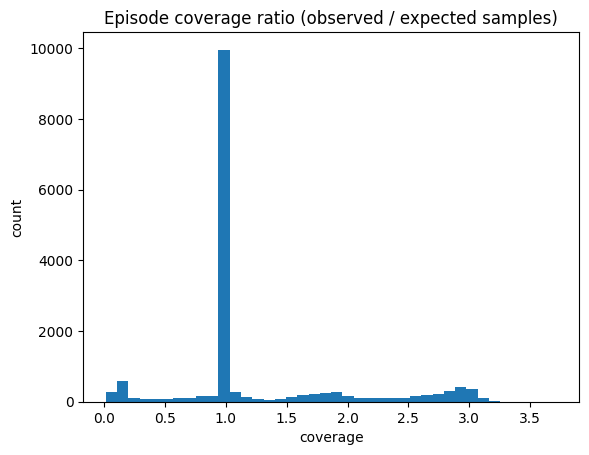

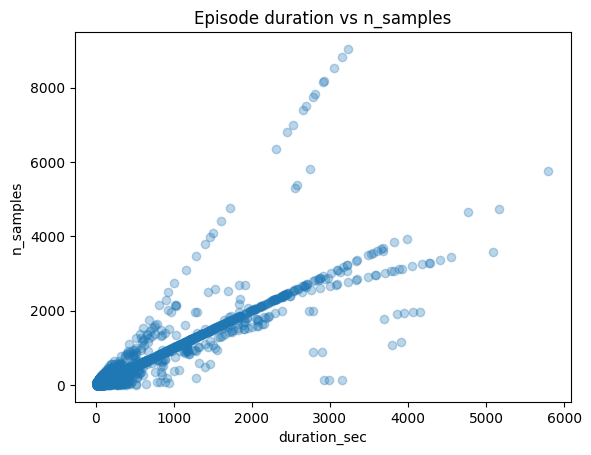

In [29]:
all_episodes = []

for INDIVID in all_individs:

    # ----------------------------
    # Stress data for individual
    # ----------------------------
    df = stress_df.loc[stress_df["INDIVID"] == INDIVID].copy()

    if len(df) < 10:
        continue

    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df = df.set_index("Timestamp").sort_index()

    # ----------------------------
    # Environmental intervals
    # ----------------------------
    env_cols = [
        "INDIVID",
        "Interval ID",
        "t_entry",
        "t_exit",
        "grid_ndvi_mean",
        "noise_L_mean",
        "roads_transportation",
        "buildings_facilities",
    ]

    env_sub = env_df.loc[env_df["INDIVID"] == INDIVID, env_cols].copy()
    if len(env_sub) == 0:
        continue

    env_sub["t_entry"] = pd.to_datetime(env_sub["t_entry"])
    env_sub["t_exit"] = pd.to_datetime(env_sub["t_exit"])
    env_sub = env_sub.sort_values(["Interval ID", "t_entry"]) # order by env intervals and time

    env_vars = [
        "grid_ndvi_mean",
        "noise_L_mean",
        "roads_transportation",
        "buildings_facilities",
    ]
    trip_col = "Interval ID"

    # ----------------------------
    # Build cell-episodes
    # ----------------------------
    episodes = []

    median_dt = df.index.to_series().diff().dt.total_seconds().median()
    if pd.isna(median_dt) or median_dt <= 0:
        median_dt = 1.0

    for _, row in env_sub.iterrows():
        t0 = row["t_entry"]
        t1 = row["t_exit"]

        mask = (df.index >= t0) & (df.index < t1)  # t1 escluso
        stress_seg = df.loc[mask, "stress_prob"].dropna()

        if len(stress_seg) < 3:
            continue

        duration_sec = (t1 - t0).total_seconds()
        if duration_sec < 20:
            continue

        episodes.append(
            {
                "INDIVID": INDIVID,
                trip_col: row[trip_col],
                "t_entry": t0,
                "t_exit": t1,
                "duration_sec": duration_sec,
                "n_samples": len(stress_seg),
                "coverage": len(stress_seg) / max(1.0, duration_sec / median_dt),
                "stress_mean": time_weighted_mean(stress_seg),
                "grid_ndvi_mean": row["grid_ndvi_mean"],
                "noise_L_mean": row["noise_L_mean"],
                "roads_transportation": row["roads_transportation"],
                "buildings_facilities": row["buildings_facilities"],
            }
        )

    if len(episodes) < 10:
        continue

    df_ep = pd.DataFrame(episodes)
    for v in env_vars:
        df_ep[v + "_raw"] = df_ep[v]

    # ----------------------------
    # Trip-centering (BEFORE z-scoring)
    # ----------------------------
    df_ep["stress_trip_c"] = df_ep["stress_mean"] - df_ep.groupby(["INDIVID", trip_col])[
        "stress_mean"
    ].transform("mean")

    for v in env_vars:
        df_ep[v + "_trip_c"] = df_ep[v] - df_ep.groupby(["INDIVID", trip_col])[v].transform("mean")

    # ----------------------------
    # Within-individual standardization
    # ----------------------------
    # (A) raw within-person z (optional, keep if you still want it)
    raw_std = df_ep[env_vars].std()
    df_ep[env_vars] = (df_ep[env_vars] - df_ep[env_vars].mean()) / raw_std.replace(0, np.nan)
    df_ep["stress_mean_z"] = (df_ep["stress_mean"] - df_ep["stress_mean"].mean()) / df_ep[
        "stress_mean"
    ].std()

    # (B) trip-centered within-person z (this is the one you’ll use for the trip-centered model)
    trip_centered_vars = [v + "_trip_c" for v in env_vars]
    tc_std = df_ep[trip_centered_vars].std()
    df_ep[trip_centered_vars] = (df_ep[trip_centered_vars] - df_ep[trip_centered_vars].mean()) / tc_std.replace(0, np.nan)
    df_ep["stress_trip_c_z"] = (df_ep["stress_trip_c"] - df_ep["stress_trip_c"].mean()) / df_ep[
        "stress_trip_c"
    ].std()

    all_episodes.append(df_ep)

df_ep_all = pd.concat(all_episodes, ignore_index=True)

print("Total episodes:", len(df_ep_all))
print("Total individuals:", df_ep_all["INDIVID"].nunique())

display(df_ep_all.head())


plt.figure()
plt.hist(df_ep_all["coverage"].dropna(), bins=40)
plt.title("Episode coverage ratio (observed / expected samples)")
plt.xlabel("coverage")
plt.ylabel("count")
plt.show()

plt.figure()
plt.scatter(df_ep_all["duration_sec"], df_ep_all["n_samples"], alpha=0.3)
plt.title("Episode duration vs n_samples")
plt.xlabel("duration_sec")
plt.ylabel("n_samples")
plt.show()


In [30]:
print(df_ep_all[[
    "stress_mean_z",
    "grid_ndvi_mean",
    "noise_L_mean",
    "roads_transportation",
    "buildings_facilities"
]].describe())

print(df_ep_all.groupby("INDIVID").size().describe())

       stress_mean_z  grid_ndvi_mean  noise_L_mean  roads_transportation  \
count   1.564300e+04    1.585000e+04  1.581500e+04          1.583500e+04   
mean    1.001580e-10   -3.496677e-17 -4.582697e-16          2.120186e-17   
std     9.975677e-01    9.975046e-01  9.975308e-01          9.975022e-01   
min    -1.636682e+01   -4.270740e+00 -4.427597e+00         -1.959222e+00   
25%    -3.895088e-01   -7.293305e-01 -6.451546e-01         -6.361094e-01   
50%    -1.057987e-01   -1.336513e-01  6.228473e-02         -2.515632e-01   
75%     3.911034e-01    6.359478e-01  6.992680e-01          3.096028e-01   
max     1.691395e+01    5.809028e+00  7.167800e+00          7.911767e+00   

       buildings_facilities  
count          1.583500e+04  
mean          -1.233971e-17  
std            9.975022e-01  
min           -2.265778e+00  
25%           -6.730291e-01  
50%           -3.343566e-01  
75%            4.178783e-01  
max            7.005188e+00  
count      80.000000
mean      198.137500
std

In [31]:
import statsmodels.formula.api as smf

df_raw = df_ep_all[["stress_mean","INDIVID","grid_ndvi_mean","noise_L_mean",
                    "roads_transportation","buildings_facilities","duration_sec"]].dropna().copy()

# (1) Solo fixed effects per persona
m_fe = smf.ols("stress_mean ~ C(INDIVID)", data=df_raw).fit()
print("R2 FE-only:", m_fe.rsquared)

# (2) FE + env (raw predictors)
m_fe_env = smf.ols(
    "stress_mean ~ C(INDIVID) + grid_ndvi_mean + noise_L_mean + roads_transportation + buildings_facilities",
    data=df_raw
).fit()
print("R2 FE+env:", m_fe_env.rsquared)
print("Delta R2:", m_fe_env.rsquared - m_fe.rsquared)


R2 FE-only: 0.9884263233802054
R2 FE+env: 0.9884291828846345
Delta R2: 2.8595044291312988e-06


In [32]:
# remove rows with NaN or inf in predictors or outcome
model_vars = [
    "stress_mean",
    "stress_mean_z",
    "stress_trip_c",
    "stress_trip_c_z",
    "grid_ndvi_mean",
    "noise_L_mean",
    "roads_transportation",
    "buildings_facilities",
    "duration_sec"
]

df_model = df_ep_all[model_vars + ["INDIVID", "Interval ID", "t_entry"]].copy()

# replace inf with NaN
df_model = df_model.replace([np.inf, -np.inf], np.nan)

# drop rows with any NaN
df_model = df_model.dropna()

print("Episodes before cleaning:", len(df_ep_all))
print("Episodes after cleaning:", len(df_model))
print("Individuals after cleaning:", df_model["INDIVID"].nunique())

df_ep_all.groupby("INDIVID").size().describe(), \
df_model.groupby("INDIVID").size().describe()



Episodes before cleaning: 15851
Episodes after cleaning: 15561
Individuals after cleaning: 75


(count      80.000000
 mean      198.137500
 std       201.787377
 min        11.000000
 25%        61.000000
 50%       139.000000
 75%       268.000000
 max      1006.000000
 dtype: float64,
 count      75.00000
 mean      207.48000
 std       204.66851
 min        11.00000
 25%        65.00000
 50%       145.00000
 75%       282.00000
 max      1006.00000
 dtype: float64)

       grid_ndvi_mean  noise_L_mean  roads_transportation  \
count       75.000000     75.000000             75.000000   
mean         0.998549      0.999783              0.999994   
std          0.009374      0.003042              0.000048   
min          0.928727      0.982552              0.999581   
25%          1.000000      1.000000              1.000000   
50%          1.000000      1.000000              1.000000   
75%          1.000000      1.000000              1.000000   
max          1.007315      1.013067              1.000000   

       buildings_facilities  stress_mean_z  
count             75.000000      75.000000  
mean               0.999995       1.000587  
std                0.000041       0.002443  
min                0.999642       1.000000  
25%                1.000000       1.000000  
50%                1.000000       1.000000  
75%                1.000000       1.000000  
max                1.000000       1.016193  


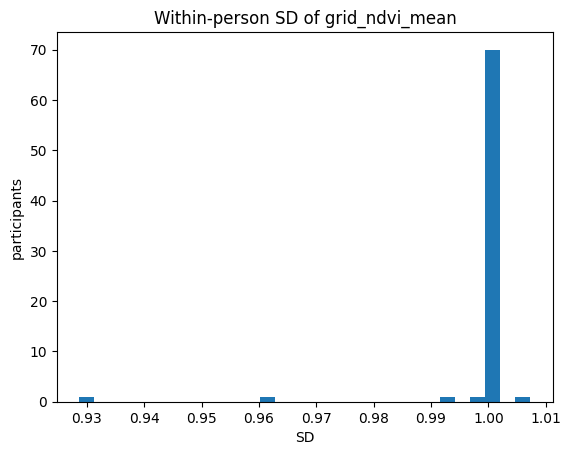

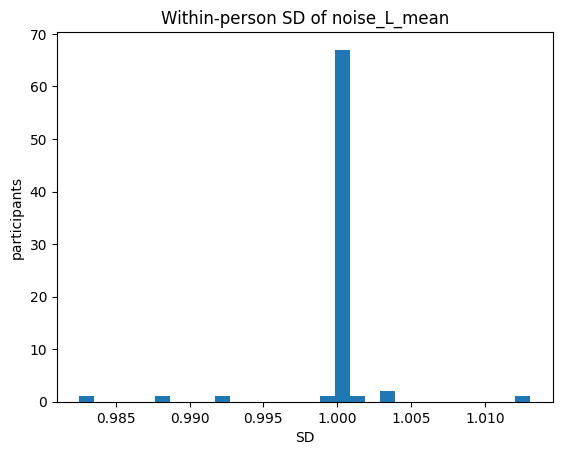

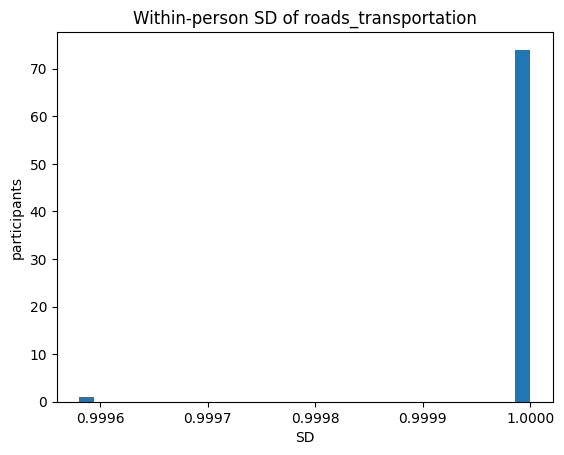

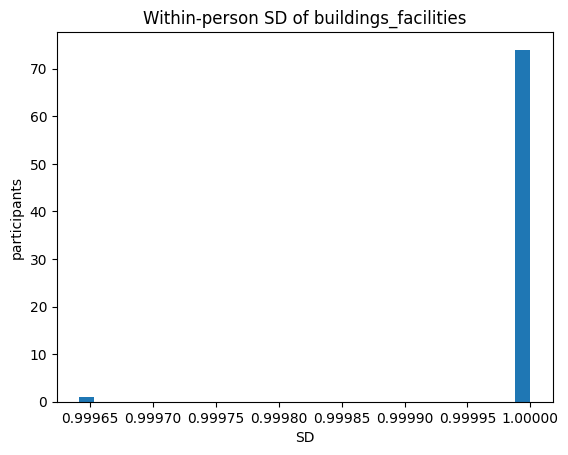

In [33]:
env_vars = ["grid_ndvi_mean","noise_L_mean","roads_transportation","buildings_facilities"]

# SD within-person dei predictors (dopo lo z-score dovrebbero essere ~1, ma occhio a casi degeneri / NaN)
sd_within = df_model.groupby("INDIVID")[env_vars + ["stress_mean_z"]].std()

print(sd_within.describe())

# Plot distribuzioni SD (sanity)
import matplotlib.pyplot as plt
for v in env_vars:
    plt.figure()
    plt.hist(sd_within[v].dropna(), bins=30)
    plt.title(f"Within-person SD of {v}")
    plt.xlabel("SD"); plt.ylabel("participants")
    plt.show()


In [34]:
min_sd = 0.05
valid_people = sd_within.index[(sd_within[env_vars] > min_sd).all(axis=1)]
df_model_sd = df_model[df_model["INDIVID"].isin(valid_people)].copy()
print("People kept after SD filter:", df_model_sd["INDIVID"].nunique())


People kept after SD filter: 75


stress_mean: mass <0.1 = 0.5003469812630118 mass >0.9 = 0.3394107627279036 n = 15851


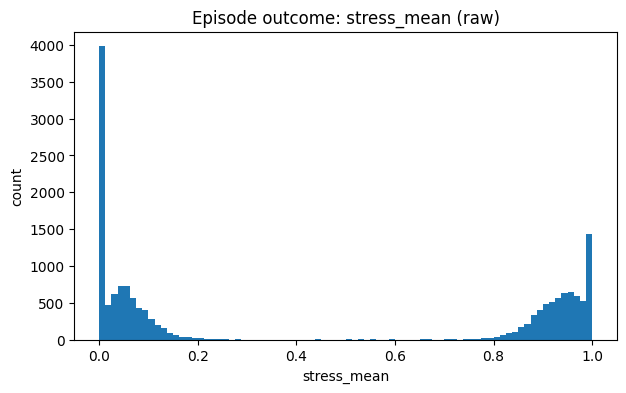

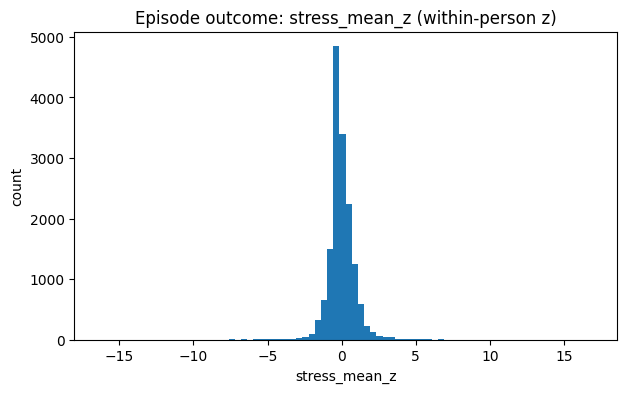

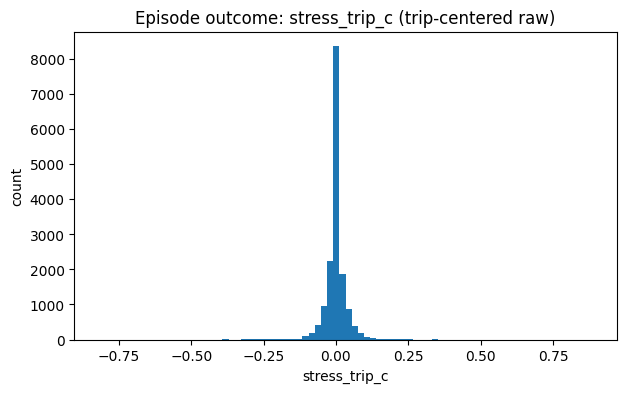

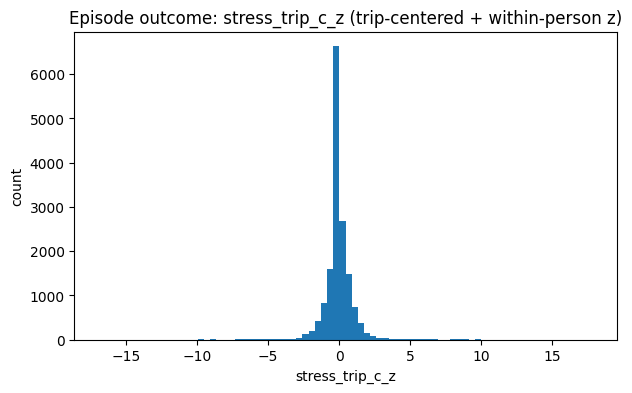


Per-person stress_mean summary:
             count          mean        std
count    80.000000  8.000000e+01  80.000000
mean    198.137500  4.263209e-01   0.035648
std     201.787377  4.582017e-01   0.029542
min      11.000000  2.325977e-15   0.000000
25%      61.000000  8.913652e-03   0.010351
50%     139.000000  5.843900e-02   0.034751
75%     268.000000  9.252693e-01   0.051940
max    1006.000000  1.000000e+00   0.136085


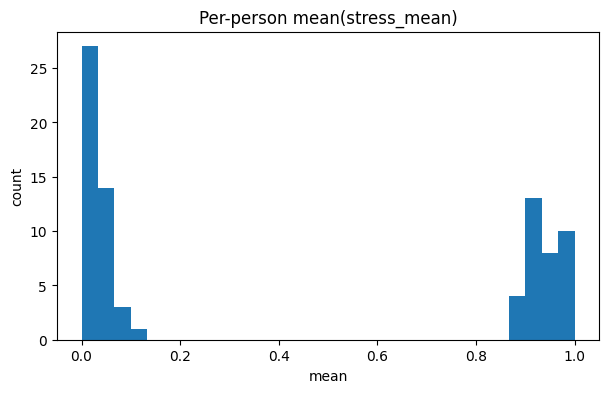

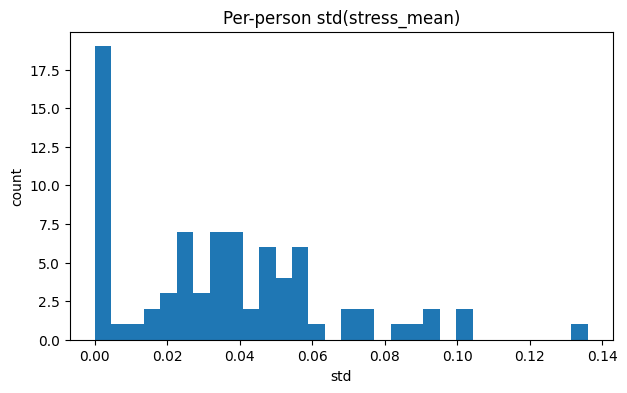

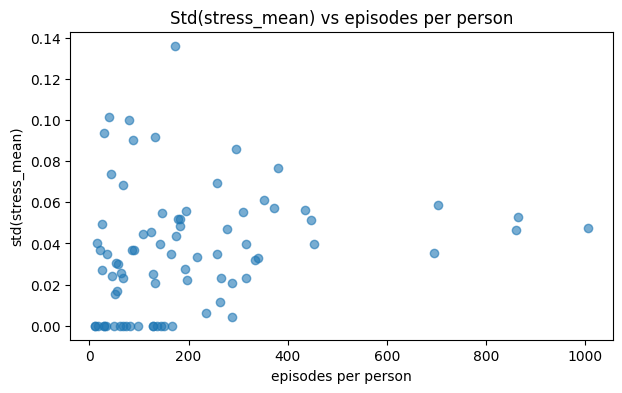

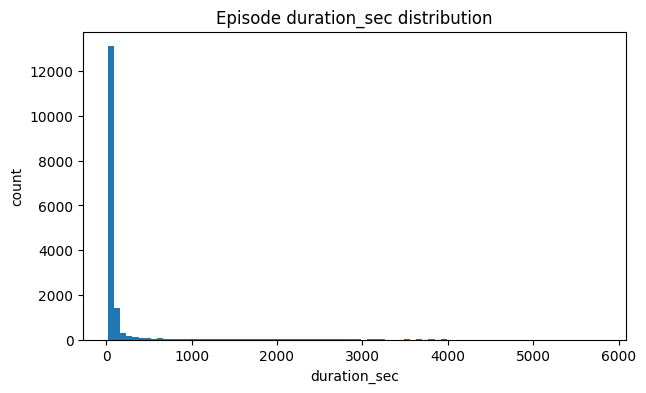

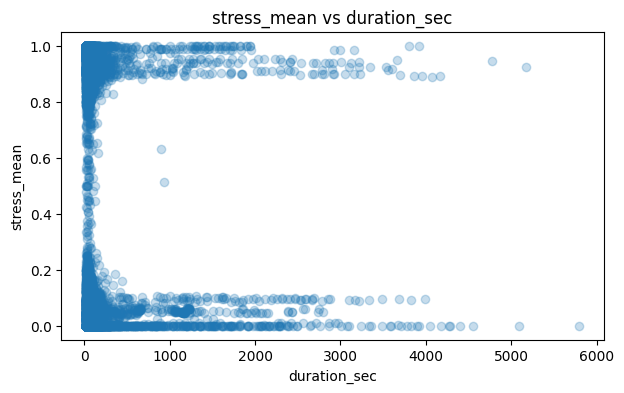

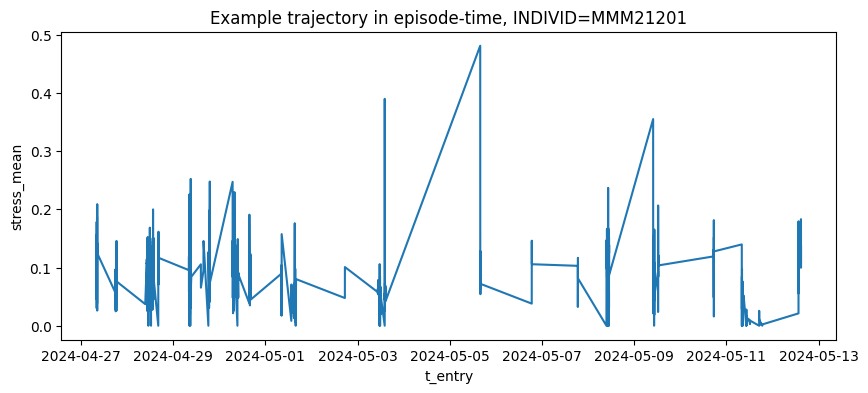

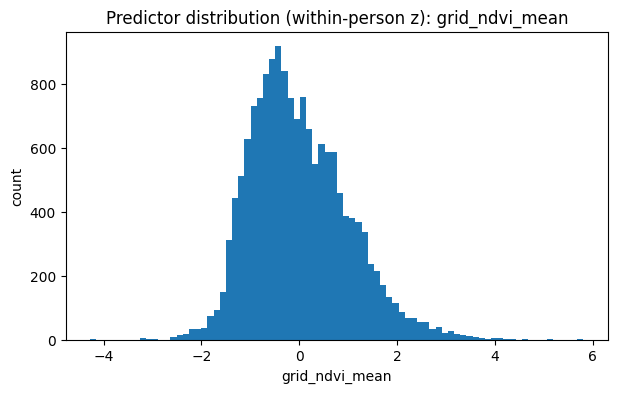

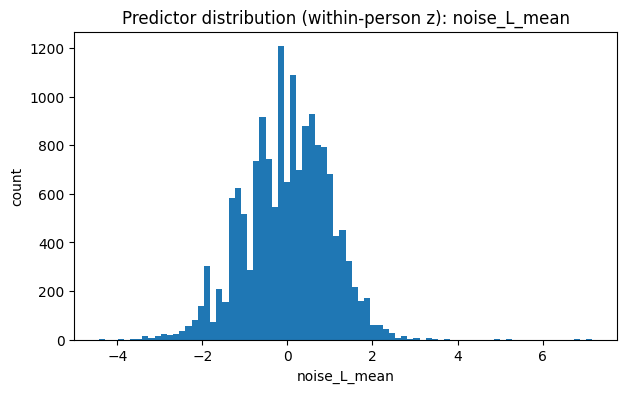

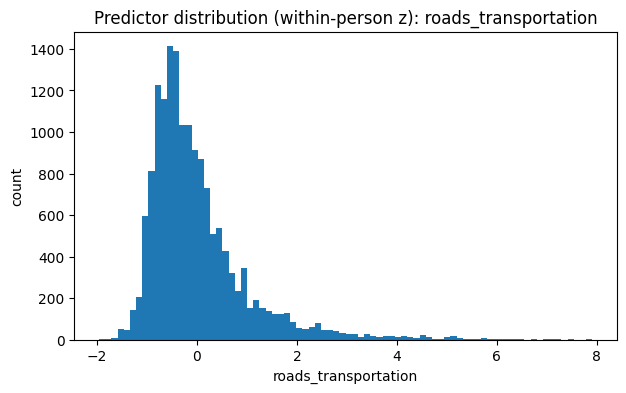

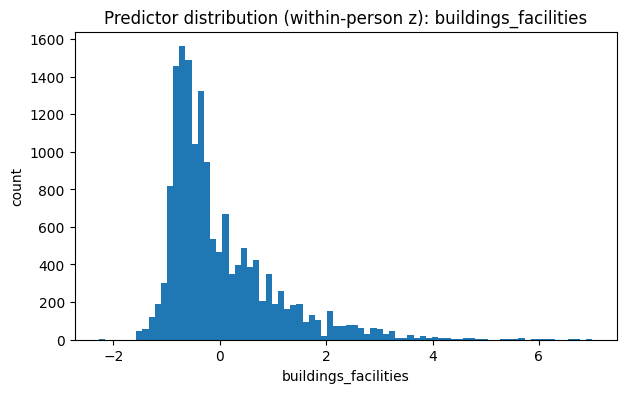

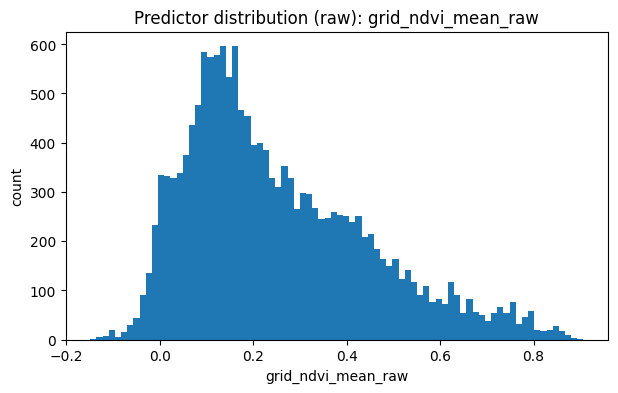

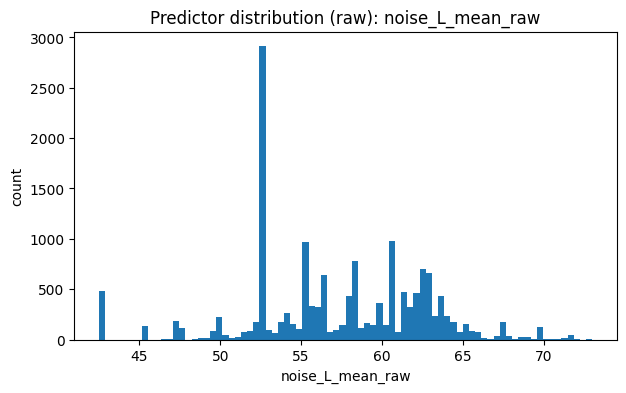

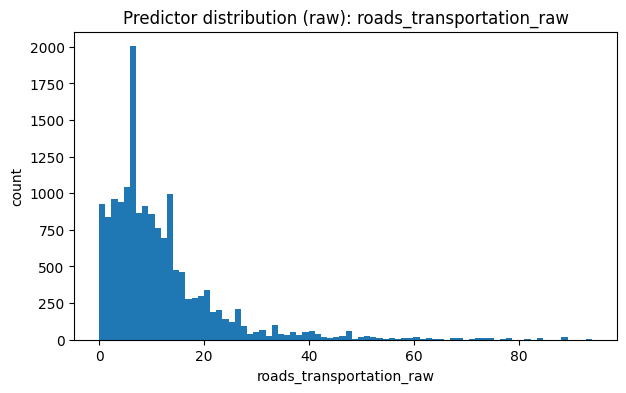

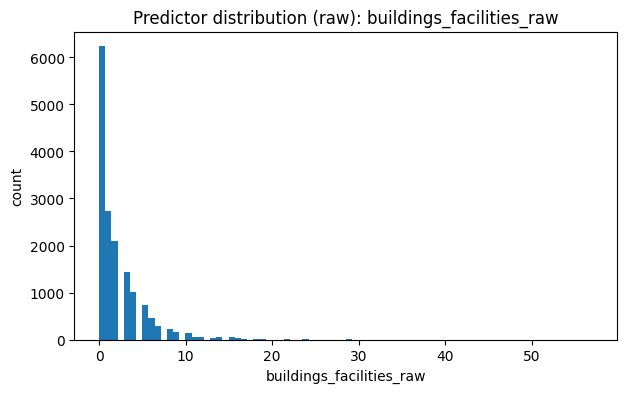

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def hist_(s, title, bins=60):
    s = s.dropna()
    plt.figure(figsize=(7,4))
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(s.name if hasattr(s, "name") else "")
    plt.ylabel("count")
    plt.show()

# ------------------------
# 1) Distribuzioni outcome
# ------------------------
s = df_ep_all["stress_mean"].dropna()
print("stress_mean: mass <0.1 =", float((s < 0.1).mean()),
      "mass >0.9 =", float((s > 0.9).mean()),
      "n =", len(s))

hist_(df_ep_all["stress_mean"],    "Episode outcome: stress_mean (raw)", bins=80)
hist_(df_ep_all["stress_mean_z"],  "Episode outcome: stress_mean_z (within-person z)", bins=80)
hist_(df_ep_all["stress_trip_c"],  "Episode outcome: stress_trip_c (trip-centered raw)", bins=80)
hist_(df_ep_all["stress_trip_c_z"],"Episode outcome: stress_trip_c_z (trip-centered + within-person z)", bins=80)

# ------------------------------------------------
# 2) Quanta varianza c'è per persona? (molto utile)
# ------------------------------------------------
pp = df_ep_all.groupby("INDIVID")["stress_mean"].agg(["count","mean","std"]).dropna()
print("\nPer-person stress_mean summary:")
print(pp.describe())

hist_(pp["mean"], "Per-person mean(stress_mean)", bins=30)
hist_(pp["std"],  "Per-person std(stress_mean)",  bins=30)

plt.figure(figsize=(7,4))
plt.scatter(pp["count"], pp["std"], alpha=0.6)
plt.title("Std(stress_mean) vs episodes per person")
plt.xlabel("episodes per person")
plt.ylabel("std(stress_mean)")
plt.show()

# --------------------------------------------
# 3) Durate episodi e relazione con stress_mean
# --------------------------------------------
hist_(df_ep_all["duration_sec"], "Episode duration_sec distribution", bins=80)

tmp = df_ep_all[["duration_sec","stress_mean"]].dropna()
plt.figure(figsize=(7,4))
plt.scatter(tmp["duration_sec"], tmp["stress_mean"], alpha=0.25)
plt.title("stress_mean vs duration_sec")
plt.xlabel("duration_sec")
plt.ylabel("stress_mean")
plt.show()

# -------------------------------------------------------
# 4) Un esempio time-series per un individuo (debug rapido)
# -------------------------------------------------------
pid0 = df_ep_all.groupby("INDIVID").size().sort_values(ascending=False).index[0]
ex = df_ep_all[df_ep_all["INDIVID"] == pid0].sort_values("t_entry")

plt.figure(figsize=(10,4))
plt.plot(ex["t_entry"], ex["stress_mean"])
plt.title(f"Example trajectory in episode-time, INDIVID={pid0}")
plt.xlabel("t_entry")
plt.ylabel("stress_mean")
plt.show()

# --------------------------
# 5) Predittori (z-scored)
# --------------------------
for v in ["grid_ndvi_mean","noise_L_mean","roads_transportation","buildings_facilities"]:
    hist_(df_ep_all[v], f"Predictor distribution (within-person z): {v}", bins=80)

# (extra) predittori raw per capire se sono quasi costanti
for v in ["grid_ndvi_mean","noise_L_mean","roads_transportation","buildings_facilities"]:
    raw = v + "_raw"
    if raw in df_ep_all.columns:
        hist_(df_ep_all[raw], f"Predictor distribution (raw): {raw}", bins=80)


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

OUTDIR = "/home/s232713/figures/ch6_dists"
os.makedirs(OUTDIR, exist_ok=True)

# -----------------------
# Small helpers
# -----------------------
def mass_near_extremes(s, lo=0.1, hi=0.9):
    s = s.dropna()
    return {
        "n": int(len(s)),
        "pct_lt_lo": float((s < lo).mean()),
        "pct_gt_hi": float((s > hi).mean()),
        "lo": lo,
        "hi": hi,
    }

def hist_ax(ax, s, title, bins=60, xlabel=None):
    s = s.dropna()
    ax.hist(s, bins=bins)
    ax.set_title(title)
    ax.set_xlabel(xlabel if xlabel is not None else (s.name if hasattr(s, "name") else ""))
    ax.set_ylabel("count")

# -----------------------
# 1) MAIN TEXT FIGURE: stress outcome (2-panel)
# -----------------------
s_raw = df_ep_all["stress_mean"]
s_z   = df_ep_all["stress_mean_z"]

m = mass_near_extremes(s_raw, lo=0.1, hi=0.9)
print(
    f"stress_mean (raw): n={m['n']}, "
    f"P(stress_mean<{m['lo']})={m['pct_lt_lo']:.3f}, "
    f"P(stress_mean>{m['hi']})={m['pct_gt_hi']:.3f}"
)

fig, axes = plt.subplots(2, 1, figsize=(7, 7), constrained_layout=True)

hist_ax(axes[0], s_raw, "Episode outcome: stress_mean (raw)", bins=80, xlabel="stress_mean")
# add numeric annotation inside the plot
axes[0].text(
    0.98, 0.95,
    f"n={m['n']}\nP(x<{m['lo']})={m['pct_lt_lo']:.2f}\nP(x>{m['hi']})={m['pct_gt_hi']:.2f}",
    transform=axes[0].transAxes,
    va="top",
    ha="right"
)

hist_ax(axes[1], s_z, "Episode outcome: stress_mean_z (within-person z)", bins=80, xlabel="stress_mean_z")

stress_fig_path = os.path.join(OUTDIR, "stress_outcome_raw_vs_z.pdf")
fig.savefig(stress_fig_path, bbox_inches="tight")
plt.close(fig)

print("Saved:", stress_fig_path)

# -----------------------
# 2) OPTIONAL: trip-centering outcome (2-panel) (if you want it later)
# -----------------------
if "stress_trip_c" in df_ep_all.columns and "stress_trip_c_z" in df_ep_all.columns:
    fig, axes = plt.subplots(2, 1, figsize=(7, 7), constrained_layout=True)
    hist_ax(axes[0], df_ep_all["stress_trip_c"], "Episode outcome: stress_trip_c (trip-centered raw)", bins=80, xlabel="stress_trip_c")
    hist_ax(axes[1], df_ep_all["stress_trip_c_z"], "Episode outcome: stress_trip_c_z (trip-centered + within-person z)", bins=80, xlabel="stress_trip_c_z")
    out = os.path.join(OUTDIR, "stress_outcome_tripcenter_raw_vs_z.pdf")
    fig.savefig(out, bbox_inches="tight")
    plt.close(fig)
    print("Saved:", out)

# -----------------------
# 3) APPENDIX: predictor distributions (raw + z) into ONE multipage PDF
# -----------------------
ENV_VARS = ["grid_ndvi_mean", "noise_L_mean", "roads_transportation", "buildings_facilities"]

# Make sure OUTDIR exists
os.makedirs(OUTDIR, exist_ok=True)

for v in ENV_VARS:
    raw_col = v + "_raw"

    # If you don't have a *_raw column, fallback to using v itself as "raw"
    # (remove this fallback if you prefer to skip instead)
    if raw_col not in df_ep_all.columns:
        raw_col = v

    s_raw = df_ep_all[raw_col].dropna()
    s_z   = df_ep_all[v].dropna()   # this is your within-person z version

    fig, axes = plt.subplots(2, 1, figsize=(7, 7), constrained_layout=True)

    hist_ax(axes[0], s_raw, f"{v}: raw", bins=80, xlabel=raw_col)
    hist_ax(axes[1], s_z,   f"{v}: within-person z", bins=80, xlabel=v)

    outpath = os.path.join(OUTDIR, f"predictor_{v}_raw_vs_z.pdf")
    fig.savefig(outpath, bbox_inches="tight")
    plt.close(fig)

    print("Saved:", outpath)


# -----------------------
# 4) OPTIONAL: per-person variability + episode duration (if you want appendix diagnostics)
# -----------------------
# Per-person mean/std of raw stress_mean
pp = (
    df_ep_all.groupby("INDIVID")["stress_mean"]
    .agg(["count", "mean", "std"])
    .dropna()
)

diag_pdf = os.path.join(OUTDIR, "appendix_outcome_diagnostics.pdf")
with PdfPages(diag_pdf) as pdf:
    fig, ax = plt.subplots(figsize=(7, 4))
    hist_ax(ax, pp["mean"], "Per-person mean(stress_mean)", bins=30, xlabel="mean(stress_mean)")
    fig.tight_layout(); pdf.savefig(fig); plt.close(fig)

    fig, ax = plt.subplots(figsize=(7, 4))
    hist_ax(ax, pp["std"], "Per-person std(stress_mean)", bins=30, xlabel="std(stress_mean)")
    fig.tight_layout(); pdf.savefig(fig); plt.close(fig)

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.scatter(pp["count"], pp["std"], alpha=0.6)
    ax.set_title("Std(stress_mean) vs episodes per person")
    ax.set_xlabel("episodes per person")
    ax.set_ylabel("std(stress_mean)")
    fig.tight_layout(); pdf.savefig(fig); plt.close(fig)

    fig, ax = plt.subplots(figsize=(7, 4))
    hist_ax(ax, df_ep_all["duration_sec"], "Episode duration distribution", bins=80, xlabel="duration_sec")
    fig.tight_layout(); pdf.savefig(fig); plt.close(fig)

print("Saved:", diag_pdf)


stress_mean (raw): n=15851, P(stress_mean<0.1)=0.500, P(stress_mean>0.9)=0.339
Saved: /home/s232713/figures/ch6_dists/stress_outcome_raw_vs_z.pdf
Saved: /home/s232713/figures/ch6_dists/stress_outcome_tripcenter_raw_vs_z.pdf
Saved: /home/s232713/figures/ch6_dists/predictor_grid_ndvi_mean_raw_vs_z.pdf
Saved: /home/s232713/figures/ch6_dists/predictor_noise_L_mean_raw_vs_z.pdf
Saved: /home/s232713/figures/ch6_dists/predictor_roads_transportation_raw_vs_z.pdf
Saved: /home/s232713/figures/ch6_dists/predictor_buildings_facilities_raw_vs_z.pdf
Saved: /home/s232713/figures/ch6_dists/appendix_outcome_diagnostics.pdf


In [37]:
y = df_model["stress_mean_z"]
X = sm.add_constant(df_model[env_vars])

pooled_ols = sm.OLS(y, X).fit(
    # cov_type="cluster",
    cov_kwds={"groups": df_model["INDIVID"]}
)

print("POOLED OLS (no weights), clustered SE")
print(pooled_ols.summary())


POOLED OLS (no weights), clustered SE
                            OLS Regression Results                            
Dep. Variable:          stress_mean_z   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.196
Date:                Mon, 19 Jan 2026   Prob (F-statistic):             0.0668
Time:                        14:32:10   Log-Likelihood:                -22045.
No. Observations:               15561   AIC:                         4.410e+04
Df Residuals:                   15556   BIC:                         4.414e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [15]:
env_vars = [
    "grid_ndvi_mean",
    "noise_L_mean",
    "roads_transportation",
    "buildings_facilities"
]

y = df_model["stress_mean_z"]

X = df_model[env_vars]
X = sm.add_constant(X)

w = np.sqrt(df_model["duration_sec"])

pooled_model = sm.WLS(y, X, weights=w).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_model["INDIVID"]}
)

print('BASELINE POOLED WEIGHTED LEAST SQUARES MODEL')
print(pooled_model.summary())

BASELINE POOLED WEIGHTED LEAST SQUARES MODEL
                            WLS Regression Results                            
Dep. Variable:          stress_mean_z   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.313
Date:                Mon, 19 Jan 2026   Prob (F-statistic):              0.273
Time:                        10:28:08   Log-Likelihood:                -21697.
No. Observations:               15561   AIC:                         4.340e+04
Df Residuals:                   15556   BIC:                         4.344e+04
Df Model:                           4                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [16]:
# episodes per person (after cleaning)
ep_per_person = df_model.groupby("INDIVID").size()
print("Episodes per person (after cleaning):")
print(ep_per_person.describe())
print("Median episodes per person:", ep_per_person.median())

# episodes per trip (after cleaning)
ep_per_trip = df_model.groupby("Interval ID").size()
print("\nEpisodes per trip (after cleaning):")
print(ep_per_trip.describe())
print("Median episodes per trip:", ep_per_trip.median())


Episodes per person (after cleaning):
count      75.00000
mean      207.48000
std       204.66851
min        11.00000
25%        65.00000
50%       145.00000
75%       282.00000
max      1006.00000
dtype: float64
Median episodes per person: 145.0

Episodes per trip (after cleaning):
count    1330.00000
mean       11.70000
std        15.41518
min         1.00000
25%         3.00000
50%         7.00000
75%        13.00000
max       169.00000
dtype: float64
Median episodes per trip: 7.0


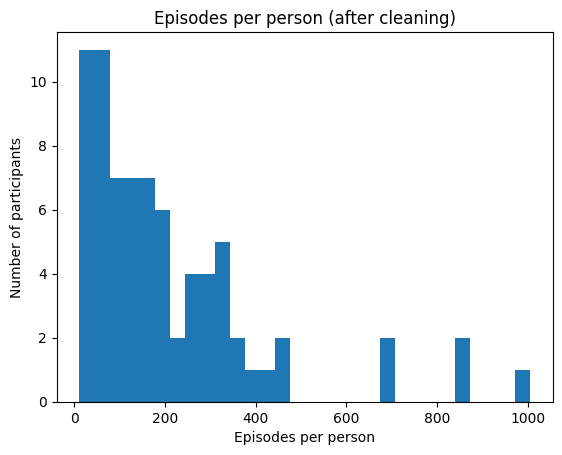

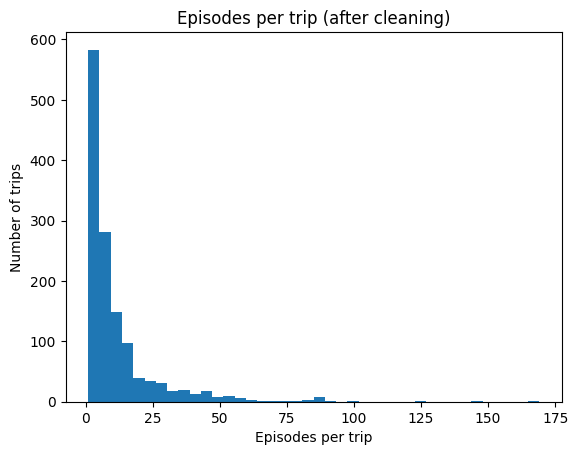

In [17]:
# Episodes per person (after cleaning)
ep_per_person = df_model.groupby("INDIVID").size()

plt.figure()
plt.hist(ep_per_person, bins=30)
plt.title("Episodes per person (after cleaning)")
plt.xlabel("Episodes per person")
plt.ylabel("Number of participants")
plt.show()

# Episodes per trip (after cleaning)
ep_per_trip = df_model.groupby("Interval ID").size()

plt.figure()
plt.hist(ep_per_trip, bins=40)
plt.title("Episodes per trip (after cleaning)")
plt.xlabel("Episodes per trip")
plt.ylabel("Number of trips")
# plt.axvline(5, color='red', linestyle='--')  # trip threshold used in robustness
plt.show()


In [18]:
# per person model

env_vars = [
    "grid_ndvi_mean",
    "noise_L_mean",
    "roads_transportation",
    "buildings_facilities"
]

min_ep_person = 50  # safe with your distribution (median 145)

rows = []
for pid, g in df_model.groupby("INDIVID"):
    if len(g) < min_ep_person:
        continue

    y_i = g["stress_mean_z"]
    X_i = sm.add_constant(g[env_vars])
    w_i = np.sqrt(g["duration_sec"])

    res_i = sm.WLS(y_i, X_i, weights=w_i).fit(cov_type="HC1")

    row = {"INDIVID": pid, "n_ep": len(g)}
    for v in env_vars:
        row[f"b_{v}"] = res_i.params.get(v, np.nan)
        row[f"p_{v}"] = res_i.pvalues.get(v, np.nan)
    rows.append(row)

df_indiv = pd.DataFrame(rows)

print("Per-person models fitted:", len(df_indiv))
print(df_indiv["n_ep"].describe())

# Frequency summary across people
summary_rows = []
for v in env_vars:
    b = df_indiv[f"b_{v}"].dropna()
    p = df_indiv[f"p_{v}"].dropna()

    summary_rows.append({
        "var": v,
        "n_models": int(b.shape[0]),
        "pct_positive": float((b > 0).mean()), # proportion of positive betas
        "pct_negative": float((b < 0).mean()), # proportion of negative betas
        "pct_p_lt_005": float((p < 0.05).mean()), # proportion of p-values < 0.05
        "beta_median": float(b.median()), # median beta
        "beta_IQR": float(b.quantile(0.75) - b.quantile(0.25)), # IQR of betas
    })

df_freq = pd.DataFrame(summary_rows).sort_values("pct_p_lt_005", ascending=False)
display(df_freq)


Per-person models fitted: 62
count      62.000000
mean      244.758065
std       206.491431
min        51.000000
25%       112.000000
50%       180.000000
75%       306.000000
max      1006.000000
Name: n_ep, dtype: float64


var  n_models  pct_positive  pct_negative  pct_p_lt_005  \
0        grid_ndvi_mean        62      0.419355      0.580645      0.193548   
1          noise_L_mean        62      0.387097      0.612903      0.193548   
3  buildings_facilities        62      0.548387      0.451613      0.177419   
2  roads_transportation        62      0.516129      0.483871      0.080645   

   beta_median  beta_IQR  
0    -0.011251  0.099539  
1    -0.026425  0.120941  
3     0.006696  0.130583  
2     0.007110  0.070749

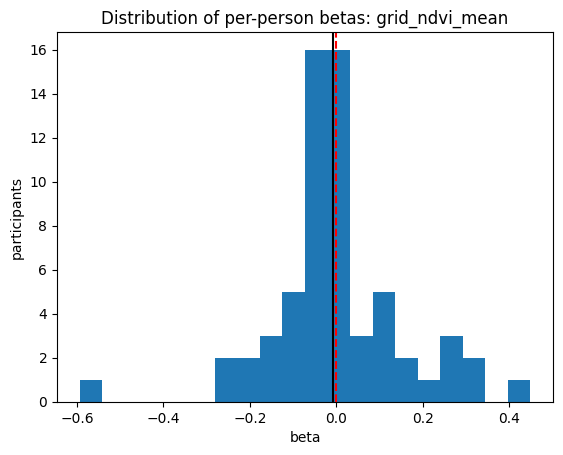

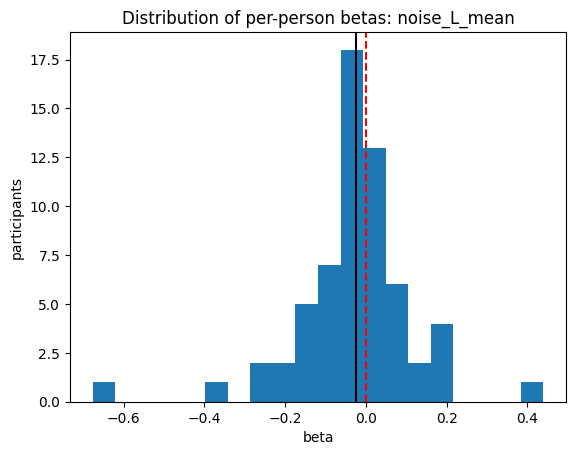

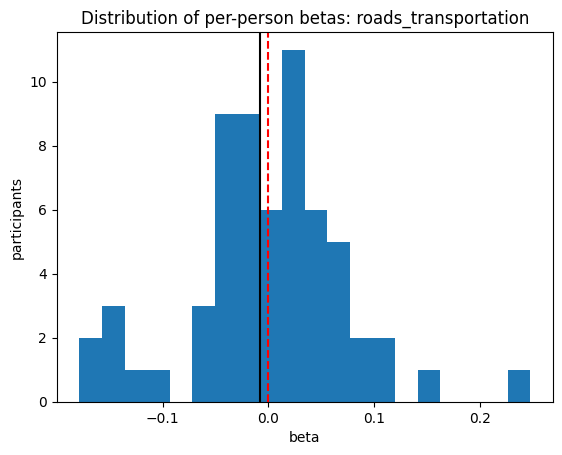

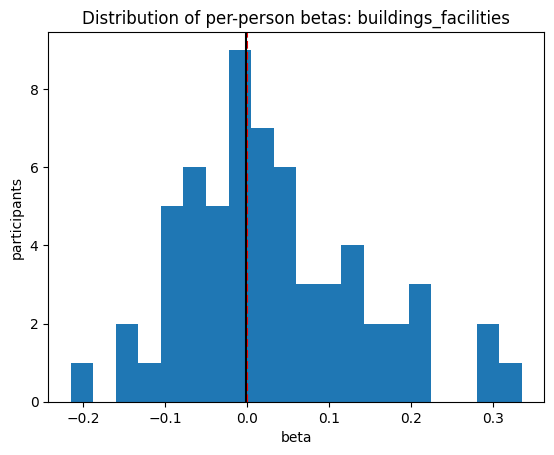

In [19]:
import matplotlib.pyplot as plt
import numpy as np

env_vars = ["grid_ndvi_mean","noise_L_mean","roads_transportation","buildings_facilities"]

for v in env_vars:
    b = df_indiv[f"b_{v}"].dropna().values

    plt.figure()
    plt.hist(b, bins=20)
    plt.axvline(0, color="red", linestyle="--")  # zero line

    # pooled estimate line (se esiste nello stesso naming)
    if v in pooled_model.params.index:
        plt.axvline(pooled_model.params[v], color="black", linestyle="-")  # pooled beta

    plt.title(f"Distribution of per-person betas: {v}")
    plt.xlabel("beta")
    plt.ylabel("participants")
    plt.show()


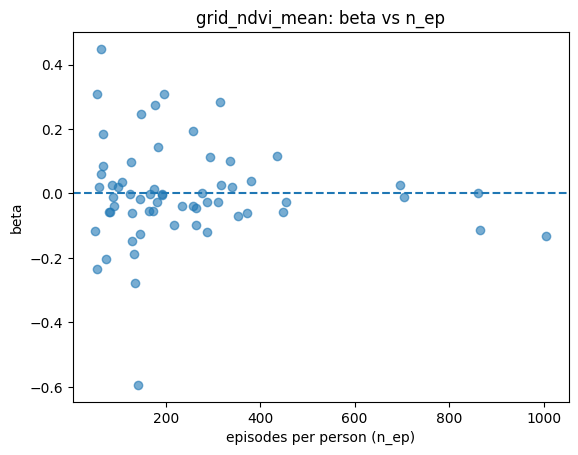

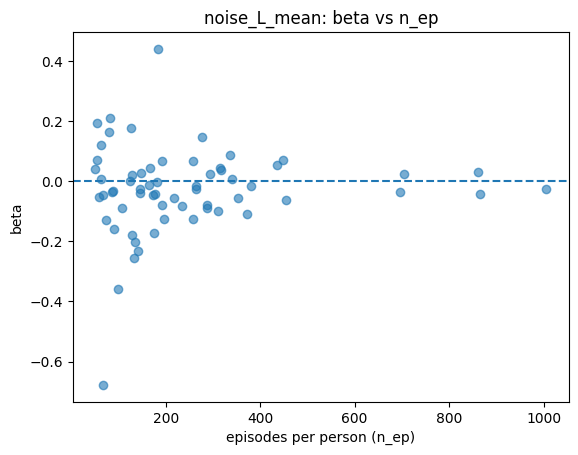

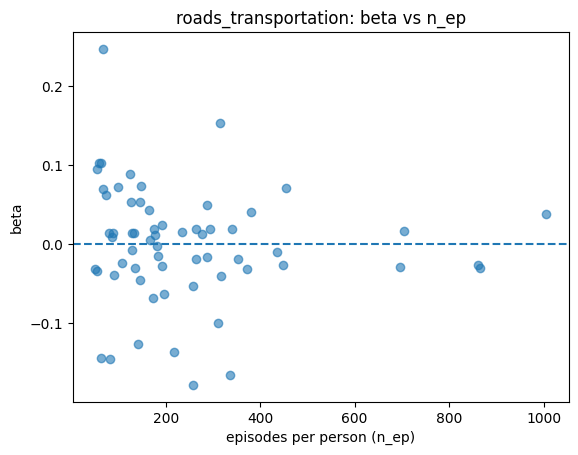

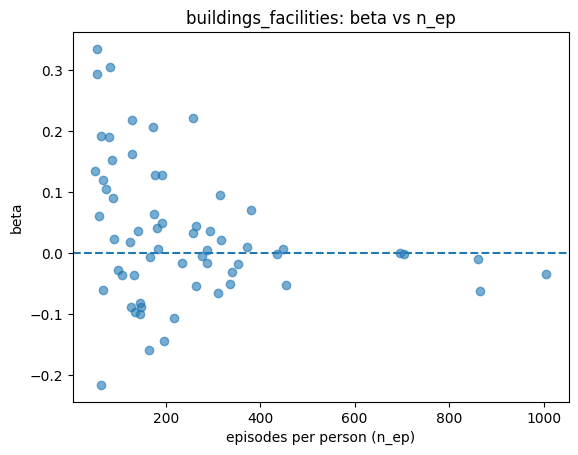

Saved: /home/s232713/figures/ch6_dists/beta_vs_nep/beta_vs_nep_grid_ndvi_mean.pdf ylims= (np.float64(-0.7336592698201312), np.float64(0.5053273597041753))
Saved: /home/s232713/figures/ch6_dists/beta_vs_nep/beta_vs_nep_noise_L_mean.pdf ylims= (np.float64(-0.7336592698201312), np.float64(0.5053273597041753))
Saved: /home/s232713/figures/ch6_dists/beta_vs_nep/beta_vs_nep_roads_transportation.pdf ylims= (np.float64(-0.7336592698201312), np.float64(0.5053273597041753))
Saved: /home/s232713/figures/ch6_dists/beta_vs_nep/beta_vs_nep_buildings_facilities.pdf ylims= (np.float64(-0.7336592698201312), np.float64(0.5053273597041753))


MergeError: Passing 'suffixes' which cause duplicate columns {'stress_sd_x'} is not allowed.

In [23]:
# 1) beta vs numero episodi
for v in env_vars:
    plt.figure()
    plt.scatter(df_indiv["n_ep"], df_indiv[f"b_{v}"], alpha=0.6)
    plt.axhline(0, linestyle="--")
    plt.title(f"{v}: beta vs n_ep")
    plt.xlabel("episodes per person (n_ep)")
    plt.ylabel("beta")
    plt.show()

import os

import os
import numpy as np
import matplotlib.pyplot as plt

OUTDIR = "/home/s232713/figures/ch6_dists/beta_vs_nep"
os.makedirs(OUTDIR, exist_ok=True)

# global y-limits across all predictors (robust to NaN)
all_betas = np.concatenate([
    df_indiv[f"b_{v}"].dropna().to_numpy()
    for v in env_vars
])
ymin, ymax = np.min(all_betas), np.max(all_betas)

# add a small padding so points don't sit on the border
pad = 0.05 * (ymax - ymin) if ymax > ymin else 0.1
ylims = (ymin - pad, ymax + pad)

for v in env_vars:
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(df_indiv["n_ep"], df_indiv[f"b_{v}"], alpha=0.6)
    ax.axhline(0, linestyle="--", alpha=0.7)
    ax.set_ylim(*ylims)

    ax.set_title(f"{v}: beta vs n_ep")
    ax.set_xlabel("episodes per person (n_ep)")
    ax.set_ylabel("beta")

    fig.tight_layout()
    outpath = os.path.join(OUTDIR, f"beta_vs_nep_{v}.pdf")
    fig.savefig(outpath, format="pdf", bbox_inches="tight")
    plt.close(fig)

    print("Saved:", outpath, "ylims=", ylims)



# 2) beta vs variabilità stress (serve ricostruire per-person std su df_model o df_ep_all)
per_std = df_model.groupby("INDIVID")["stress_mean_z"].std()  # oppure stress_mean raw se preferisci
df_indiv = df_indiv.merge(per_std.rename("stress_sd"), left_on="INDIVID", right_index=True, how="left")

for v in env_vars:
    plt.figure()
    plt.scatter(df_indiv["stress_sd"], df_indiv[f"b_{v}"], alpha=0.6)
    plt.axhline(0, linestyle="--")
    plt.title(f"{v}: beta vs within-person stress SD")
    plt.xlabel("within-person SD of stress")
    plt.ylabel("beta")
    plt.show()


In [21]:
from statsmodels.stats.multitest import multipletests

for v in env_vars:
    p = df_indiv[f"p_{v}"].dropna().values
    rej, p_adj, _, _ = multipletests(p, alpha=0.05, method="fdr_bh")
    print(v, "significant after FDR:", rej.sum(), "/", len(p))


grid_ndvi_mean significant after FDR: 7 / 62
noise_L_mean significant after FDR: 6 / 62
roads_transportation significant after FDR: 0 / 62
buildings_facilities significant after FDR: 2 / 62


Models: 72


INDIVID  n_ep  b_grid_ndvi_mean  lo_grid_ndvi_mean  hi_grid_ndvi_mean  \
0  MMM12501    68          0.084729          -0.066099           0.235556   
1  MMM12601    91         -0.040066          -0.177603           0.097471   
2  MMM12701    62          0.449010          -0.051439           0.949459   
3  MMM12801    67          0.183642          -0.073408           0.440692   
4  MMM12901   127          0.097365          -0.120328           0.315059   

   p_grid_ndvi_mean  b_noise_L_mean  lo_noise_L_mean  hi_noise_L_mean  \
0          0.270886       -0.047767        -0.505752         0.410218   
1          0.568029       -0.160554        -0.348650         0.027542   
2          0.078661        0.118478        -0.093538         0.330495   
3          0.161441       -0.677342        -1.141246        -0.213437   
4          0.380698        0.175774        -0.008143         0.359691   

   p_noise_L_mean  b_roads_transportation  lo_roads_transportation  \
0        0.838025                0.247749                -0.140955   
1        0.094332               -0.038745                -0.156419   
2        0.273402               -0.144665                -0.371365   
3        0.004213                0.069568                -0.096383   
4        0.061043                0.053450                -0.125225   

   hi_roads_transportation  p_roads_transportation  b_buildings_facilities  \
0                 0.636452                0.211582                0.120709   
1                 0.078930                0.518719                0.023050   
2                 0.082035                0.211036               -0.215544   
3                 0.235518                0.411287               -0.059929   
4                 0.232125                0.557663               -0.087675   

   lo_buildings_facilities  hi_buildings_facilities  p_buildings_facilities  
0                -0.036130                 0.277547                0.131437  
1                -0.127833                 0.173933                0.764619  
2                -0.489480                 0.058392                0.123030  
3                -0.142189                 0.022331                0.153323  
4                -0.271990                 0.096640                0.351173

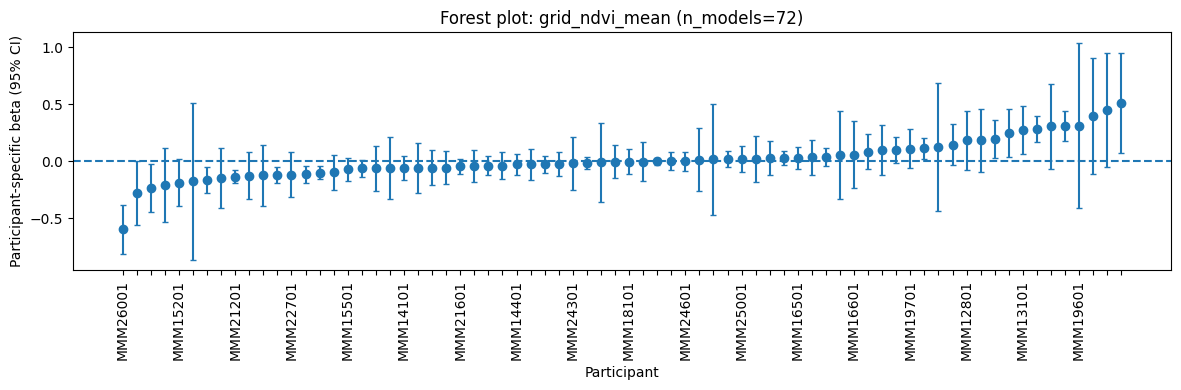

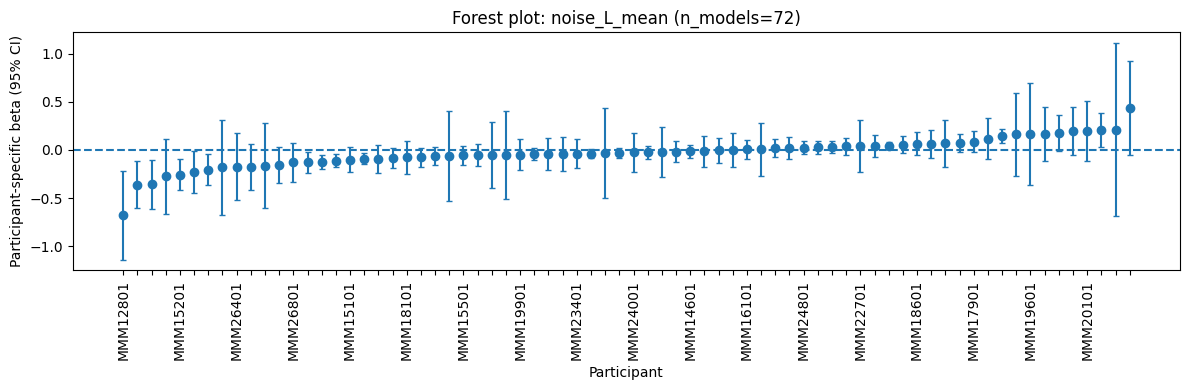

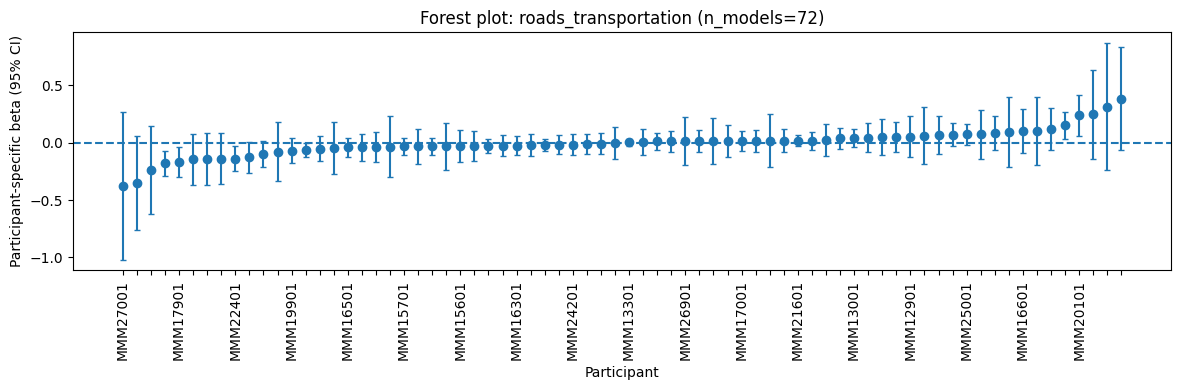

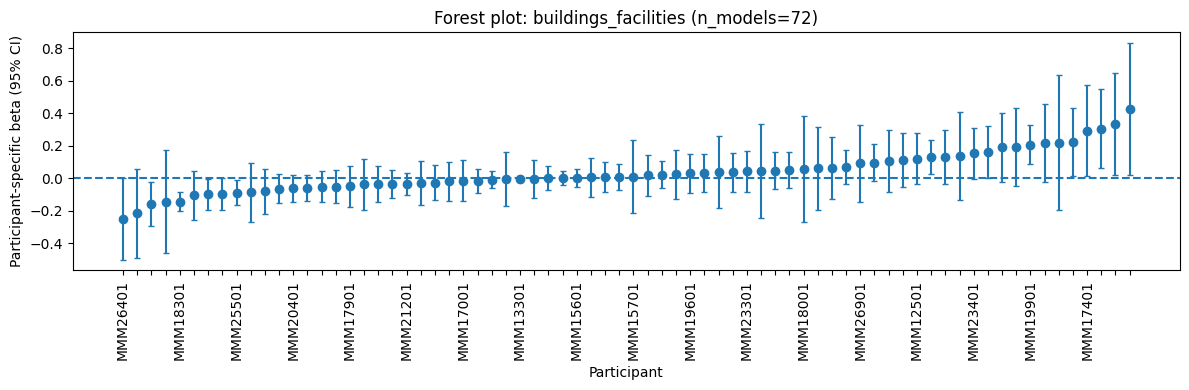

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

ENV_VARS = ["grid_ndvi_mean","noise_L_mean","roads_transportation","buildings_facilities"]
min_ep_person = 20

rows = []
for pid, g in df_model.groupby("INDIVID"):
    if len(g) < min_ep_person:
        continue

    y_i = g["stress_mean_z"]
    X_i = sm.add_constant(g[ENV_VARS])
    w_i = np.sqrt(g["duration_sec"])

    res_i = sm.WLS(y_i, X_i, weights=w_i).fit(cov_type="HC1")
    ci = res_i.conf_int(alpha=0.05)  # uses robust SE from HC1

    row = {"INDIVID": pid, "n_ep": len(g)}
    for v in ENV_VARS:
        row[f"b_{v}"]  = res_i.params.get(v, np.nan)
        row[f"lo_{v}"] = ci.loc[v, 0] if v in ci.index else np.nan
        row[f"hi_{v}"] = ci.loc[v, 1] if v in ci.index else np.nan
        row[f"p_{v}"]  = res_i.pvalues.get(v, np.nan)
    rows.append(row)

df_indiv_ci = pd.DataFrame(rows)
print("Models:", len(df_indiv_ci))
display(df_indiv_ci.head())

def forest_plot(df_indiv_ci, var, label_every=5, figsize=(12, 4), outdir="/home/s232713/figures"):
    d = df_indiv_ci.dropna(subset=[f"b_{var}", f"lo_{var}", f"hi_{var}"]).copy()
    d = d.sort_values(f"b_{var}").reset_index(drop=True)

    x = np.arange(len(d))
    b  = d[f"b_{var}"].to_numpy()
    lo = d[f"lo_{var}"].to_numpy()
    hi = d[f"hi_{var}"].to_numpy()

    # vertical CI -> yerr
    yerr = np.vstack([b - lo, hi - b])

    labels = d["INDIVID"].astype(str).tolist()
    if label_every is not None and label_every > 1:
        labels = [lab if (i % label_every == 0) else "" for i, lab in enumerate(labels)]

    fig, ax = plt.subplots(figsize=figsize)
    ax.errorbar(x, b, yerr=yerr, fmt="o", capsize=2)
    ax.axhline(0, linestyle="--")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel("Participant-specific beta (95% CI)")
    ax.set_xlabel("Participant")
    ax.set_title(f"Forest plot: {var} (n_models={len(d)})")
    fig.tight_layout()

    fig.savefig(f"{outdir}/forest_plot_{var}.pdf", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)


for v in ENV_VARS:
    forest_plot(df_indiv_ci, v, label_every=4)

   




Share stress_prob ~0 or ~1: 0.8597629423385179


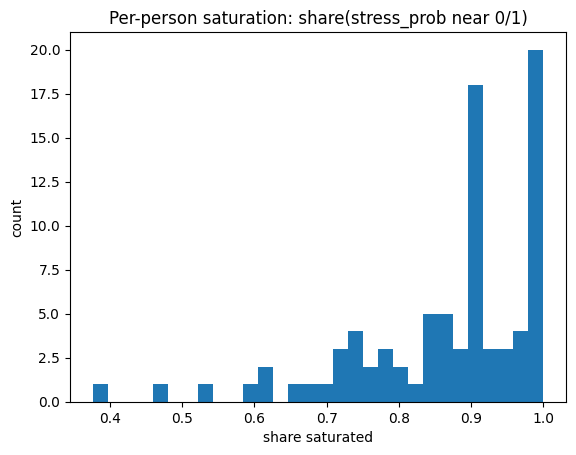

In [23]:
eps = 1e-3
p_sat = ((stress_df["stress_prob"] <= eps) | (stress_df["stress_prob"] >= 1-eps)).mean()
print("Share stress_prob ~0 or ~1:", p_sat)

sat_by_ind = stress_df.groupby("INDIVID")["stress_prob"].apply(
    lambda s: ((s <= eps) | (s >= 1-eps)).mean()
).sort_values(ascending=False)

plt.figure()
plt.hist(sat_by_ind, bins=30)
plt.title("Per-person saturation: share(stress_prob near 0/1)")
plt.xlabel("share saturated")
plt.ylabel("count")
plt.show()


plot that shows if positivi betas are valuable or viceversa

In [24]:
def zscore_safe(s: pd.Series) -> pd.Series:
    sd = s.std()
    if sd == 0 or np.isnan(sd):
        return pd.Series(np.nan, index=s.index)
    return (s - s.mean()) / sd

env_vars = [
    "grid_ndvi_mean",
    "noise_L_mean",
    "roads_transportation",
    "buildings_facilities"
]

# Build a clean episode table that includes stress_mean (raw), predictors, duration, trip id
need_cols = ["INDIVID", "Interval ID", "duration_sec", "stress_mean"] + env_vars
df_tc = df_ep_all[need_cols].copy()
df_tc = df_tc.replace([np.inf, -np.inf], np.nan).dropna()

# Keep only trips with enough episodes (stabilises trip mean)
trip_counts = df_tc.groupby("Interval ID").size()
valid_trips = trip_counts[trip_counts >= 5].index
df_tc = df_tc[df_tc["Interval ID"].isin(valid_trips)].copy()

# Trip-centered outcome: subtract trip mean (within person + trip)
df_tc["stress_trip_c"] = df_tc["stress_mean"] - df_tc.groupby(["INDIVID", "Interval ID"])["stress_mean"].transform("mean")

# Then within-person z-score (so interpretation matches your baseline style)
df_tc["stress_trip_c_z"] = df_tc.groupby("INDIVID")["stress_trip_c"].transform(zscore_safe)

# (Optional) also trip-center predictors, then within-person z-score again
do_trip_center_predictors = False

if do_trip_center_predictors:
    tc_vars = []
    for v in env_vars:
        v_tc = v + "_trip_c"
        df_tc[v_tc] = df_tc[v] - df_tc.groupby(["INDIVID", "Interval ID"])[v].transform("mean")
        df_tc[v_tc] = df_tc.groupby("INDIVID")[v_tc].transform(zscore_safe)
        tc_vars.append(v_tc)
    X_vars = tc_vars
else:
    X_vars = env_vars

df_tc = df_tc.dropna(subset=["stress_trip_c_z"] + X_vars)

y = df_tc["stress_trip_c_z"]
X = sm.add_constant(df_tc[X_vars])
w = np.sqrt(df_tc["duration_sec"])

rob_model = sm.WLS(y, X, weights=w).fit(
    cov_type="cluster",
    cov_kwds={"groups": df_tc["INDIVID"]}
)

print("ROBUSTNESS: trip-centered outcome, trips with >=5 episodes")
print(rob_model.summary())
print("\nTrips kept:", df_tc["Interval ID"].nunique(), "Episodes kept:", len(df_tc))


ROBUSTNESS: trip-centered outcome, trips with >=5 episodes
                            WLS Regression Results                            
Dep. Variable:        stress_trip_c_z   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     1.785
Date:                Sun, 18 Jan 2026   Prob (F-statistic):              0.141
Time:                        17:19:20   Log-Likelihood:                -19577.
No. Observations:               14342   AIC:                         3.916e+04
Df Residuals:                   14337   BIC:                         3.920e+04
Df Model:                           4                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [25]:
import statsmodels.formula.api as smf
from scipy import stats
import numpy as np

formula = "stress_mean_z ~ grid_ndvi_mean + noise_L_mean + roads_transportation + buildings_facilities"

# Base model: random intercept only
m0 = smf.mixedlm(
    formula,
    data=df_model,
    groups=df_model["INDIVID"],
    re_formula="1"
).fit(reml=False, method="lbfgs")

def test_random_slope(var):
    m1 = smf.mixedlm(
        formula,
        data=df_model,
        groups=df_model["INDIVID"],
        re_formula=f"1 + {var}"
    ).fit(reml=False, method="lbfgs")

    LR = 2 * (m1.llf - m0.llf)

    # approx df=2 because adding: Var(slope) + Cov(intercept,slope)
    p = 1 - stats.chi2.cdf(LR, df=2)

    # slope SD
    cov_re = m1.cov_re
    slope_sd = np.sqrt(cov_re.loc[var, var]) if var in cov_re.index else np.nan

    return {
        "var": var,
        "LR": LR,
        "p_chi2_df2": p,
        "slope_sd": slope_sd,
        "llf_m0": m0.llf,
        "llf_m1": m1.llf
    }

results = []
for v in ["grid_ndvi_mean","noise_L_mean","roads_transportation","buildings_facilities"]:
    try:
        results.append(test_random_slope(v))
    except Exception as e:
        results.append({"var": v, "error": str(e)})

df_lrt = pd.DataFrame(results)
df_lrt


/home/s232713/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/s232713/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/home/s232713/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/s232713/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/home/s232713/.local/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(ms

var   LR  p_chi2_df2  slope_sd  llf_m0        llf_m1
0        grid_ndvi_mean -inf         1.0  0.264629     inf -22113.465262
1          noise_L_mean -inf         1.0  0.266411     inf -22124.871345
2  roads_transportation -inf         1.0  0.058584     inf -22037.072482
3  buildings_facilities -inf         1.0  0.066888     inf -22039.276258

# Plots

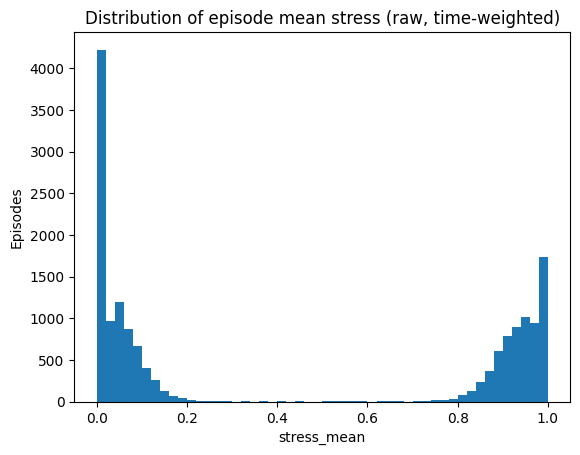

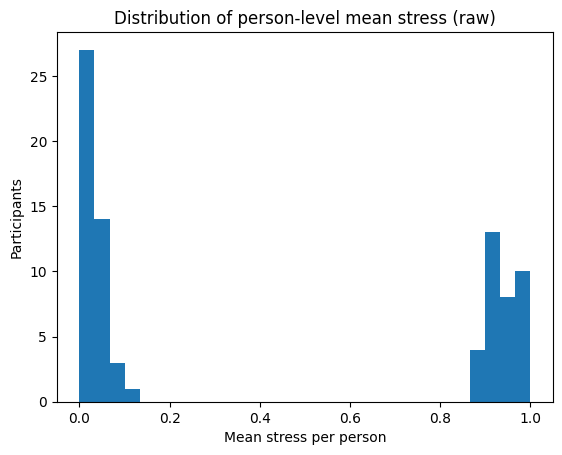

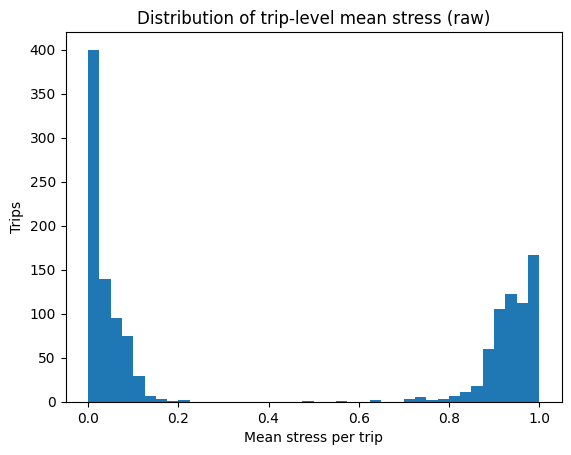

In [26]:
# Raw episode stress_mean distribution (all episodes before standardization)
plt.figure()
plt.hist(df_ep_all["stress_mean"].dropna(), bins=50)
plt.title("Distribution of episode mean stress (raw, time-weighted)")
plt.xlabel("stress_mean")
plt.ylabel("Episodes")
plt.show()

# Person-level baseline stress (mean across episodes)
person_mean_stress = df_ep_all.groupby("INDIVID")["stress_mean"].mean().dropna()

plt.figure()
plt.hist(person_mean_stress, bins=30)
plt.title("Distribution of person-level mean stress (raw)")
plt.xlabel("Mean stress per person")
plt.ylabel("Participants")
plt.show()

# Trip-level baseline stress (mean across episodes)
trip_mean_stress = df_ep_all.groupby("Interval ID")["stress_mean"].mean().dropna()

plt.figure()
plt.hist(trip_mean_stress, bins=40)
plt.title("Distribution of trip-level mean stress (raw)")
plt.xlabel("Mean stress per trip")
plt.ylabel("Trips")
plt.show()


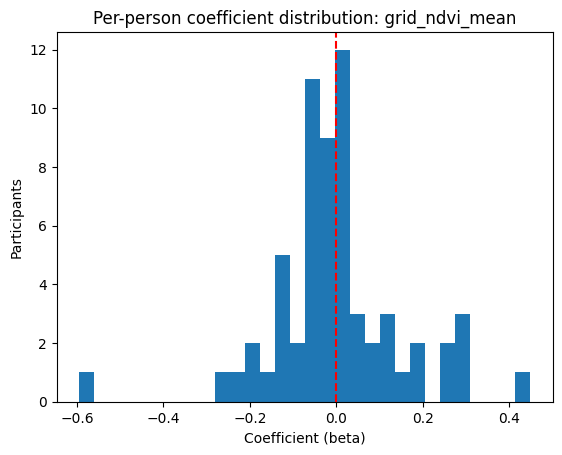

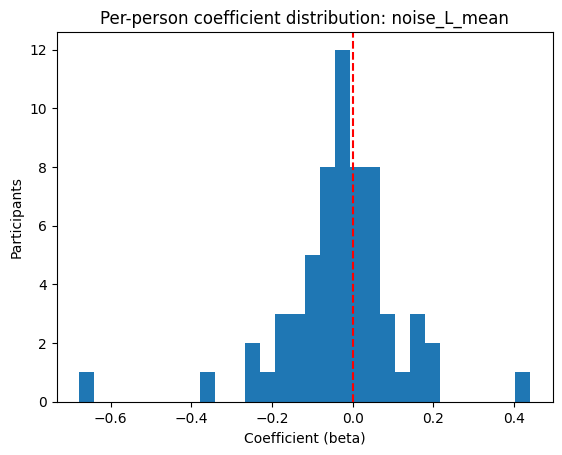

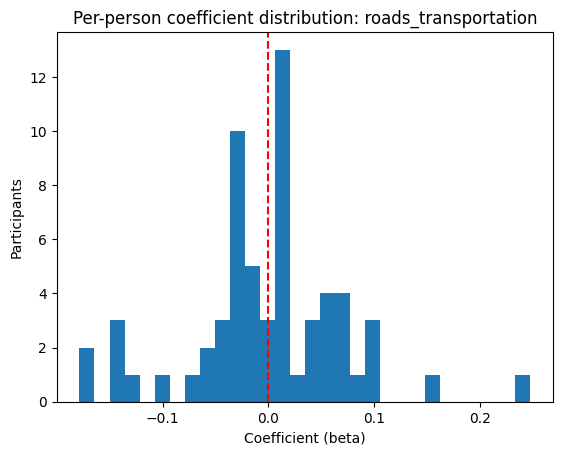

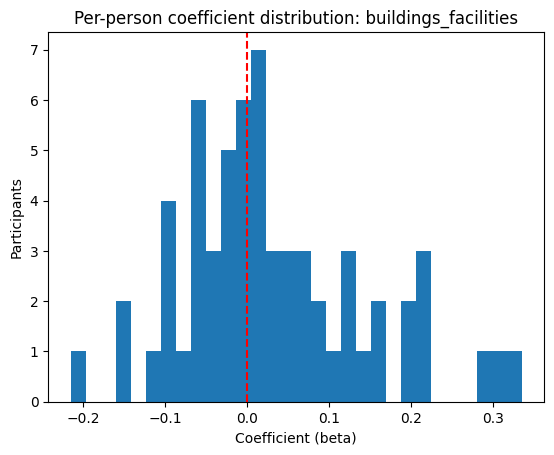

In [27]:
env_vars = [
    "grid_ndvi_mean",
    "noise_L_mean",
    "roads_transportation",
    "buildings_facilities"
]

for v in env_vars:
    b = df_indiv[f"b_{v}"].dropna()

    plt.figure()
    plt.hist(b, bins=30)
    plt.title(f"Per-person coefficient distribution: {v}")
    plt.xlabel("Coefficient (beta)")
    plt.ylabel("Participants")
    plt.axvline(0, color='red', linestyle='--')
    plt.show()


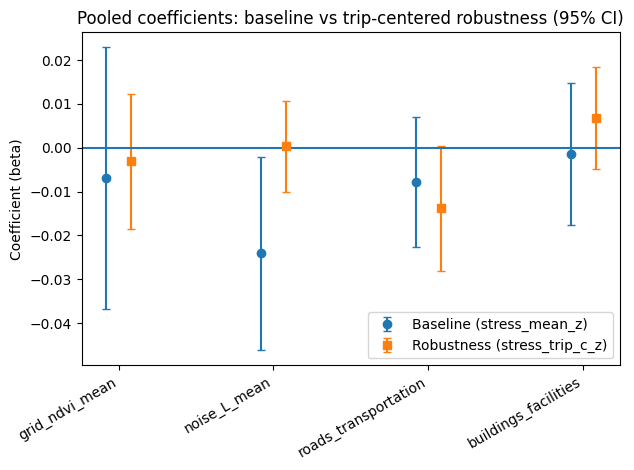

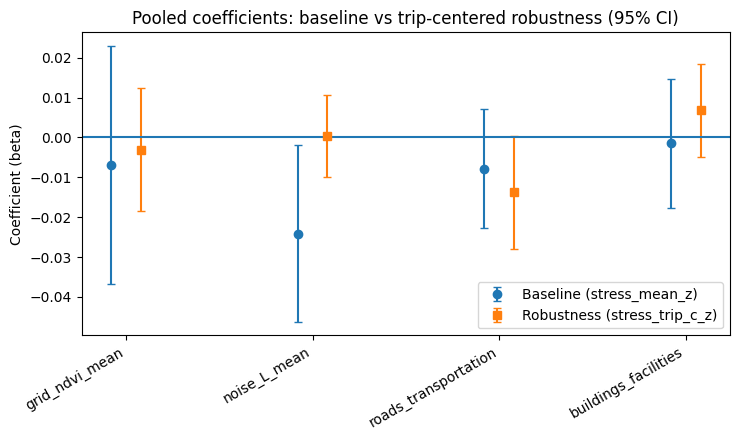

Saved: /home/s232713/figures/pooled_beta_baseline_vs_tripcentered.pdf


In [ ]:
def coef_table(res, vars_):
    rows = []
    for v in vars_:
        b = float(res.params[v])
        se = float(res.bse[v])
        rows.append({
            "var": v,
            "beta": b,
            "lo": b - 1.96 * se,
            "hi": b + 1.96 * se
        })
    return pd.DataFrame(rows)

base_tab = coef_table(pooled_model, env_vars)
rob_tab  = coef_table(rob_model, env_vars)

# Merge for plotting
cmp = base_tab.merge(rob_tab, on="var", suffixes=("_baseline", "_robust"))

x = np.arange(len(env_vars))

plt.figure()
plt.errorbar(
    x - 0.08,
    cmp["beta_baseline"],
    yerr=[cmp["beta_baseline"] - cmp["lo_baseline"], cmp["hi_baseline"] - cmp["beta_baseline"]],
    fmt="o",
    capsize=3,
    label="Baseline (stress_mean_z)"
)
plt.errorbar(
    x + 0.08,
    cmp["beta_robust"],
    yerr=[cmp["beta_robust"] - cmp["lo_robust"], cmp["hi_robust"] - cmp["beta_robust"]],
    fmt="s",
    capsize=3,
    label="Robustness (stress_trip_c_z)"
)

plt.xticks(x, env_vars, rotation=30, ha="right")
plt.title("Pooled coefficients: baseline vs trip-centered robustness (95% CI)")
plt.ylabel("Coefficient (beta)")
plt.axhline(0)
plt.legend()
plt.tight_layout()
plt.show()

outpath = "/home/s232713/figures/pooled_beta_baseline_vs_tripcentered.pdf"

fig, ax = plt.subplots(figsize=(7.5, 4.5))

ax.errorbar(
    x - 0.08,
    cmp["beta_baseline"],
    yerr=[
        cmp["beta_baseline"] - cmp["lo_baseline"],
        cmp["hi_baseline"] - cmp["beta_baseline"]
    ],
    fmt="o",
    capsize=3,
    label="Baseline (stress_mean_z)"
)
ax.errorbar(
    x + 0.08,
    cmp["beta_robust"],
    yerr=[
        cmp["beta_robust"] - cmp["lo_robust"],
        cmp["hi_robust"] - cmp["beta_robust"]
    ],
    fmt="s",
    capsize=3,
    label="Robustness (stress_trip_c_z)"
)

ax.set_xticks(x)
ax.set_xticklabels(env_vars, rotation=30, ha="right")
ax.set_title("Pooled coefficients: baseline vs trip-centered robustness (95% CI)")
ax.set_ylabel("Coefficient (beta)")
ax.axhline(0)
ax.legend()
fig.tight_layout()

fig.savefig(outpath, format="pdf", bbox_inches="tight")
# plt.show()

print("Saved:", outpath)



## Episode-based exposure modelling (pooled, per-person, and trip-centered robustness)

### Goal
Estimate how much **environmental exposures** (greenness, noise, roads, buildings) are associated with **ambulatory stress** during walking, while respecting:
- irregular GPS sampling,
- strong temporal dependence at high frequency,
- between-person heterogeneity.

This notebook implements the **episode-based exposure model** and two extensions:
1) **per-person models** (heterogeneity summary),
2) **trip-centered robustness** (remove trip-level baseline shifts).

---

### Data inputs
- `gps_trip_stress.csv` (`stress_df`): time-stamped stress estimates at GPS resolution for each participant.
- `foot_time_env.csv` (`env_df`): entry/exit intervals in spatial grid cells with environmental attributes.

Key identifiers:
- `INDIVID`: participant id
- `Interval ID`: trip identifier (used for trip-level centering)
- `[t_entry, t_exit)`: time interval spent in one grid cell

---

### Time-weighted episode stress
A helper function `time_weighted_mean()` computes the mean stress within an episode weighted by inter-sample time deltas:
- weights: `dt_i = t_i - t_{i-1}` (clipped at 0)
- episode stress:  
  $
  \bar{s} = \frac{\sum_i s_i \, dt_i}{\sum_i dt_i}
  $
This reduces sensitivity to irregular sampling density.

---

### Step 1, Build spatial "episodes"
For each participant:
1) Load stress time series and set `Timestamp` as sorted index.
2) Load environmental intervals per grid cell (`t_entry`, `t_exit`) and selected predictors:
   - `grid_ndvi_mean`, `noise_L_mean`, `roads_transportation`, `buildings_facilities`
3) For each interval `[t_entry, t_exit)`:
   - extract stress points with timestamps in the interval,
   - require at least 3 stress points,
   - require duration >= 20 seconds,
   - compute time-weighted mean stress (`stress_mean`),
   - attach environment features for that cell.

Participant-level filters:
- skip participants with < 10 stress points overall,
- skip participants with < 10 valid episodes.

Output: episode table with one row per (participant, cell-stay).

---

### Step 2, Standardization and centering
We compute two variants of outcomes/predictors.

#### (A) Baseline within-person z-scores
For each participant, standardize:
- outcome: `stress_mean_z`
- predictors: z-scored versions of the selected environment features

This answers:
> within a person, do episodes in different environments have higher/lower stress than that person's typical level?

#### (B) Trip-centering + within-person z-scores (for robustness)
To remove trip-level baseline shifts, compute:
- `stress_trip_c = stress_mean - mean(stress_mean | INDIVID, Interval ID)`
- `stress_trip_c_z`: within-person z-score of `stress_trip_c`

Optional (not used by default): also trip-center predictors in the same way.

This answers:
> within the same trip, do episodes in different environments deviate from that trip's baseline stress?

---

### Step 3, Cleaning
From the concatenated episode table:
- keep required columns,
- replace `±inf` with `NaN`,
- drop rows with any `NaN`.

We also compute data coverage diagnostics:
- episodes per person (median and distribution),
- episodes per trip (median and distribution).

---

### Step 4, Pooled baseline model (population-average)
We fit a duration-weighted pooled regression:
- weights: `w = sqrt(duration_sec)` (longer episodes contribute more)
- model: WLS with cluster-robust SE by `INDIVID`

\[
y_{ie} = \alpha + \beta^\top x_{ie} + \varepsilon_{ie}
\]
with:
- \(y_{ie} =\) `stress_mean_z`
- \(x_{ie} =\) standardized environment predictors
- SE clustered by participant to account for within-person correlation

Interpretation:
- pooled \(\beta\) is the **average association** across the sample.

---

### Step 5, Per-person models (heterogeneity)
For participants with enough episodes (`min_ep_person = 50`):
- fit the same WLS model separately per participant,
- compute coefficient summaries across people:
  - % positive vs % negative per predictor
  - % p < 0.05 per predictor (descriptive only, power differs by person)
  - median coefficient and IQR (heterogeneity magnitude)

Interpretation:
- if signs are mixed and IQR is large relative to the median, average effects can cancel out in the pooled model.

---

### Step 6, Robustness: trip-centered outcome
To reduce noise from very short trips, restrict to trips with at least 5 episodes.
Then fit the pooled WLS model with:
- outcome: `stress_trip_c_z`
- predictors: standardized environment predictors (not trip-centered by default)
- clustered SE by participant

Interpretation:
- checks whether pooled estimates change when removing "trip mood" or contextual baseline shifts.

---

### Expected narrative from these outputs
- Pooled baseline effects can be weak even with many episodes if individual-level associations differ in sign/magnitude.
- Per-person models quantify heterogeneity and show whether any predictor has consistent direction across people.
- Trip-centered robustness tests whether trip-level baseline differences were masking any within-trip spatial association.

(When writing the thesis, report the key sample sizes: individuals after cleaning, total episodes, median episodes per person, median episodes per trip, and the robustness restriction threshold.)


-----------
-----------
-----------
-----------
